# K-means clustering

## import library

In [532]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [533]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

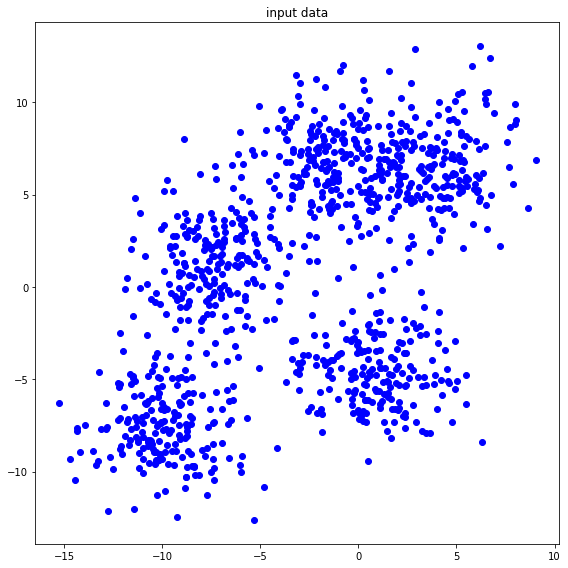

In [534]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [535]:
def compute_distance(feature, center):
    # Euclidean distance
    
    delta = feature - center # (x1 - x2, y1 - y2)
    distance = np.sum(np.power(delta,2), axis=1)
    
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [560]:
def compute_centroid(feature, label_feature, value_label, centroid):
    
    feature_idx = np.where(label_feature.reshape(number_data,) == value_label)
    number_point = np.array(feature_idx).size
    
    # 해당하는 점이 하나도 없는 경우 값 유지
    if number_point != 0:
        centroid = np.sum(feature[feature_idx], axis=0) / number_point
    
    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [561]:
def compute_label(distance):
    # 가장 가까운 centroid로 label 지정: 각 행의 최솟값
    
    index_label_feature = np.argmin(distance, axis=1)
    
    return index_label_feature

In [563]:
number_cluster      = 10
number_iteration    = 30

In [565]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))

# 임의의 label 설정 -> centroid
label_cluster = [i for i in range(number_cluster)]
label_feature = np.random.randint(len(label_cluster), size=(number_data,1))

for i in range(number_iteration):

    for j, k in enumerate(label_cluster):
        centroid[j] = compute_centroid(feature, label_feature, k, centroid[j])
        distance[:, j] = compute_distance(feature, centroid[j])
    
    label_feature = compute_label(distance)
    
    # 각 클러스터의 센트로이드까지 거리를 모두 더한 값 / data 수
    # distance 행마다 label_feature의 열만 더하면 된다.
    summ = 0
    for j, d in enumerate(distance):
        summ += d[label_feature[j]]
    
    loss_iteration[i] = summ/number_data
    centroid_iteration[i] = centroid
    
    print("iteration = %4d, loss = %5.9f" % (i, loss_iteration[i]))
    #print("centroid = \n", centroid)
    

iteration =    0, loss = 55.967381658
iteration =    1, loss = 10.589182577
iteration =    2, loss = 8.169357876
iteration =    3, loss = 6.475017034
iteration =    4, loss = 5.442660341
iteration =    5, loss = 5.058755154
iteration =    6, loss = 4.965078280
iteration =    7, loss = 4.933135331
iteration =    8, loss = 4.912058245
iteration =    9, loss = 4.899449488
iteration =   10, loss = 4.891301925
iteration =   11, loss = 4.889085447
iteration =   12, loss = 4.888542772
iteration =   13, loss = 4.888068520
iteration =   14, loss = 4.888068520
iteration =   15, loss = 4.888068520
iteration =   16, loss = 4.888068520
iteration =   17, loss = 4.888068520
iteration =   18, loss = 4.888068520
iteration =   19, loss = 4.888068520
iteration =   20, loss = 4.888068520
iteration =   21, loss = 4.888068520
iteration =   22, loss = 4.888068520
iteration =   23, loss = 4.888068520
iteration =   24, loss = 4.888068520
iteration =   25, loss = 4.888068520
iteration =   26, loss = 4.888068520

## plot the results

In [540]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')

    plt.scatter(x, y, color='blue')

    plt.tight_layout()
    plt.show()

In [541]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    
    X = np.linspace(0, number_iteration, number_iteration)
    plt.plot(X, loss_iteration, color='red')

    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [543]:
def plot_centroid(centroid_iteration):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    
    #initial, final
    plt.scatter(centroid_iteration[0, :, :1], centroid_iteration[0, :, 1:], marker='o', color='blue', label='initial')
    plt.scatter(centroid_iteration[-1, :, :1], centroid_iteration[-1, :, 1:], marker='s', color='red', label='final')
    
    # each cluster
    for i in range(number_cluster):
        plt.plot(centroid_iteration[:, i, :1], centroid_iteration[:, i, 1:], label=f'cluster={i}')
    
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [545]:
def plot_cluster(feature, label_feature, label_cluster):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    
    # each cluster
    for cluster in label_cluster:
        idx = np.where(label_feature.reshape(number_data,) == cluster)
        plt.scatter(feature[:, :1][idx], feature[:, 1:][idx])
    
    plt.tight_layout()
    plt.show()


***

# results

***

1. plot the input data

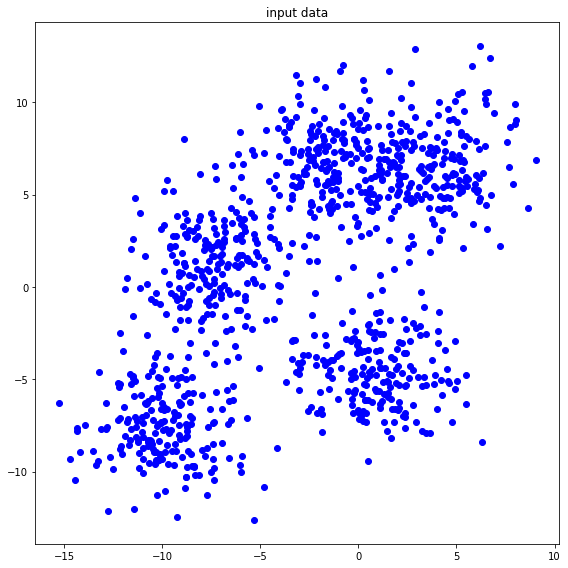

In [547]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

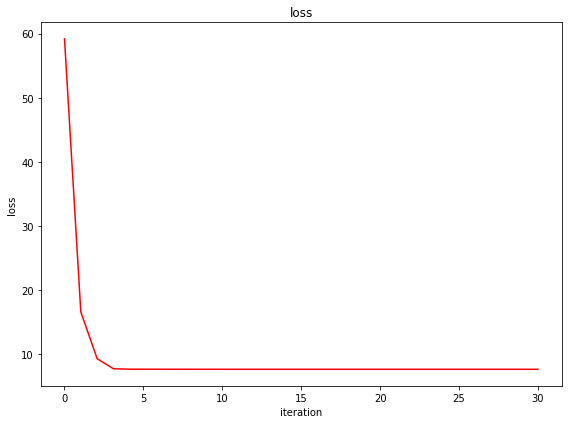

In [548]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

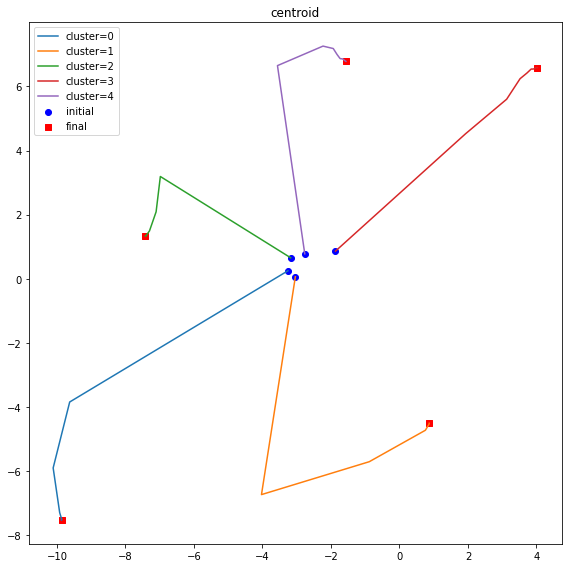

In [549]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

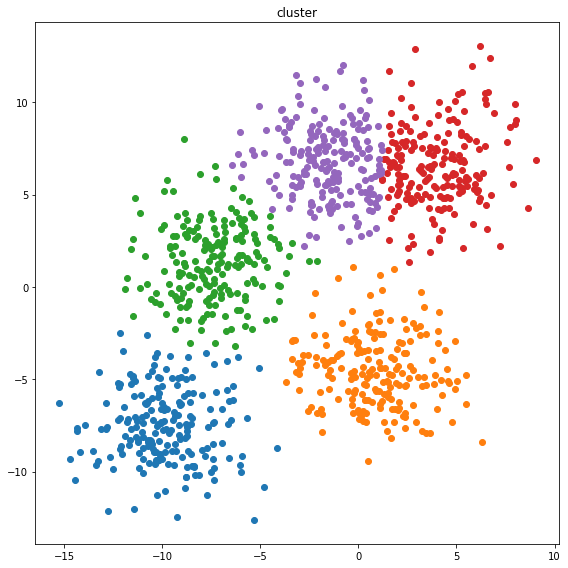

In [550]:
plot_cluster(feature, label_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

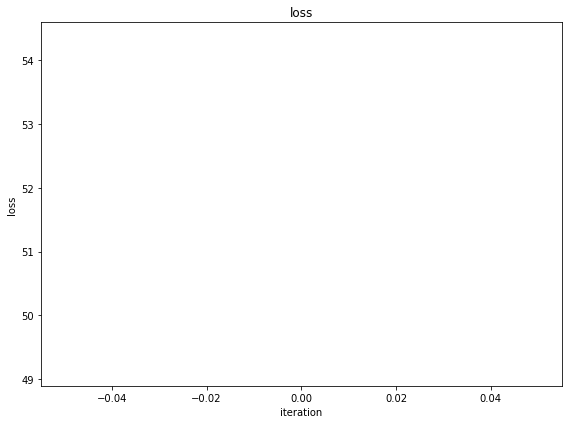

In [558]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

In [ ]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

In [ ]:
plot_cluster(feature, label_feature, label_cluster)

***